# Tree Based Methods
Fernando Delgado

## Exercise 3

Consider the Gini index, classification error, and entropy in a
simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of ˆpm1. The xaxis
should display ˆpm1, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes, ˆpm1 = 1− ˆpm2. You could make
this plot by hand, but it will be much easier to make in R.

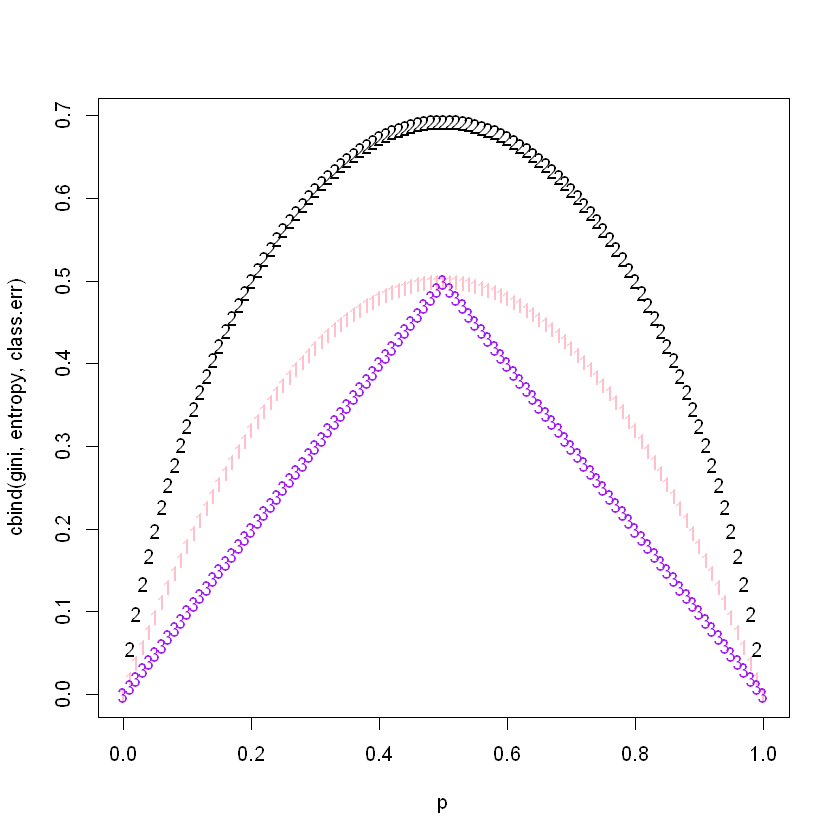

In [1]:
p = seq(0, 1, 0.01)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)

#plot
matplot(p, cbind(gini, entropy, class.err), col = c("pink", "black", "purple"))

## Exercise 5

Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?

In [2]:
p <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [4]:
#Majority
#Red
red <- sum(p >= 0.5)

#Green
green <- sum(p < 0.5)

ifelse(red > green, "Red", "Green")

[1] "Red"

In [5]:
#Average
avg <- mean(p)

ifelse(avg >= 0.5, "Red", "Green")

[1] "Green"

## Exercise 8

In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

In [6]:
library(ISLR)
attach(Carseats)

a) Split the data set into a training set and a test set.

In [7]:
#Match train and test
set.seed(2, sample.kind = "Rounding")

train_index <- sample(1:nrow(Carseats), nrow(Carseats)/2)

train <- Carseats[train_index,] 
test <- Carseats[-train_index,] 

Warning message in set.seed(2, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


In [8]:
head(train)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
74,12.61,118,90,10,54,104,Good,31,11,No,Yes
281,2.86,121,86,10,496,145,Bad,51,10,Yes,Yes
229,5.40,149,73,13,381,163,Bad,26,11,No,Yes
67,8.85,127,92,0,508,91,Medium,56,18,Yes,No
374,5.58,137,71,0,402,116,Medium,78,17,Yes,No
373,7.80,121,50,0,508,98,Medium,65,11,No,No


In [9]:
head(test)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
9,6.54,132,110,0,108,124,Medium,76,10,No,No
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes
12,11.96,117,94,4,503,94,Good,50,13,Yes,Yes


b) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

In [10]:
library(tree)

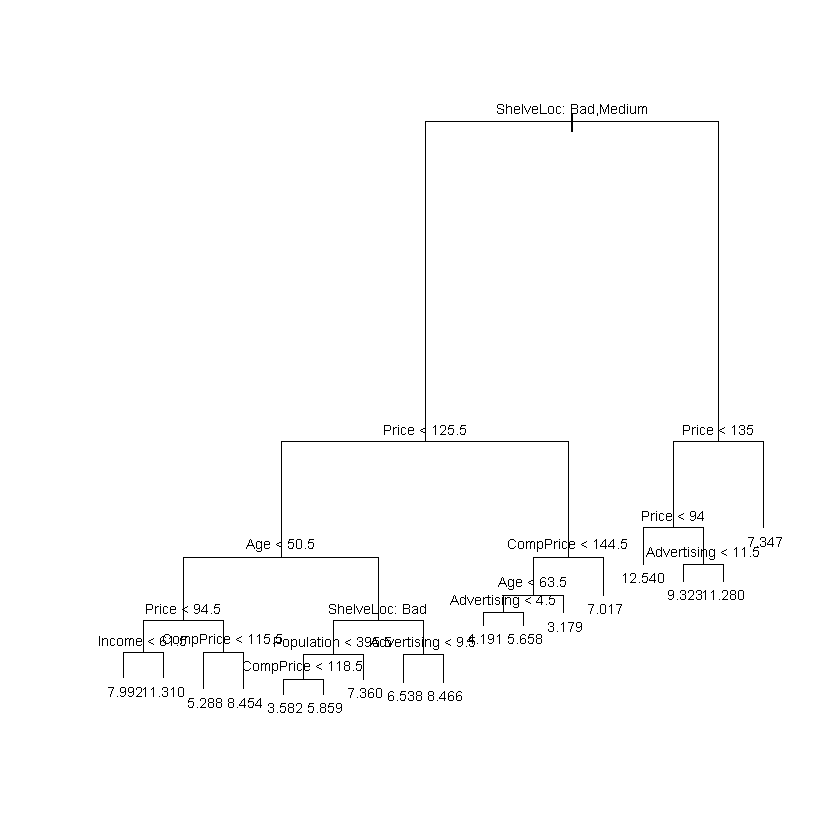

In [11]:
treez <- tree(Sales ~ ., train)

plot(treez)
text(treez, pretty = 0, cex = 0.7)

Shelveloc and Price are the most important branches of the tree since they are the ones that appear on the top (first branches)

In [12]:
summary(treez)


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "CompPrice"  
[6] "Population"  "Advertising"
Number of terminal nodes:  17 
Residual mean deviance:  2.341 = 428.4 / 183 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.76700 -1.00900 -0.01558  0.00000  0.94900  3.58600 

There's a total of 17 nodes

In [25]:
#MSE
test_pred <- predict(treez, test)
mean((test_pred - test$Sales)^2)

[1] 4.844991

Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

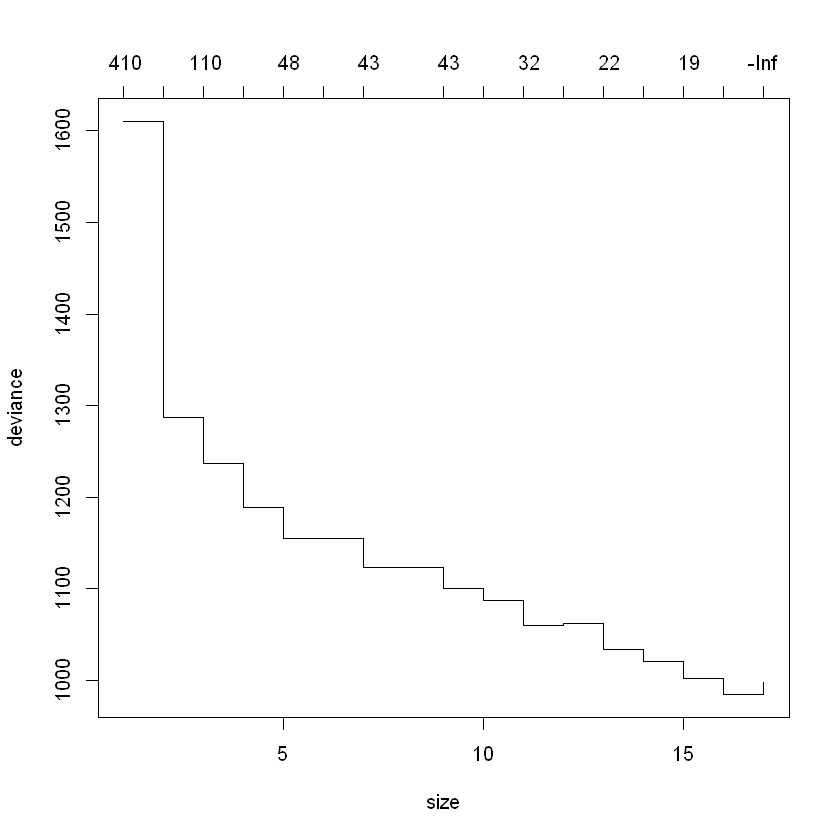

In [22]:
set.seed(123)
cvalidation =cv.tree(treez) 
plot(cvalidation)

Seems like the best node level is 17

In [26]:
prunez=prune.tree(treez,best=17)

test_pred <- predict(prunez, test)
mean((test_pred - test$Sales)^2)

[1] 4.844991

We get exactly the same MSE

d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine
which variables are most important.

In [28]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [30]:
bagged_treez <- randomForest(y = train$Sales, 
                                   x = train[ ,-1], 
                                   mtry = ncol(train) - 1, # 10
                                   importance = T) 

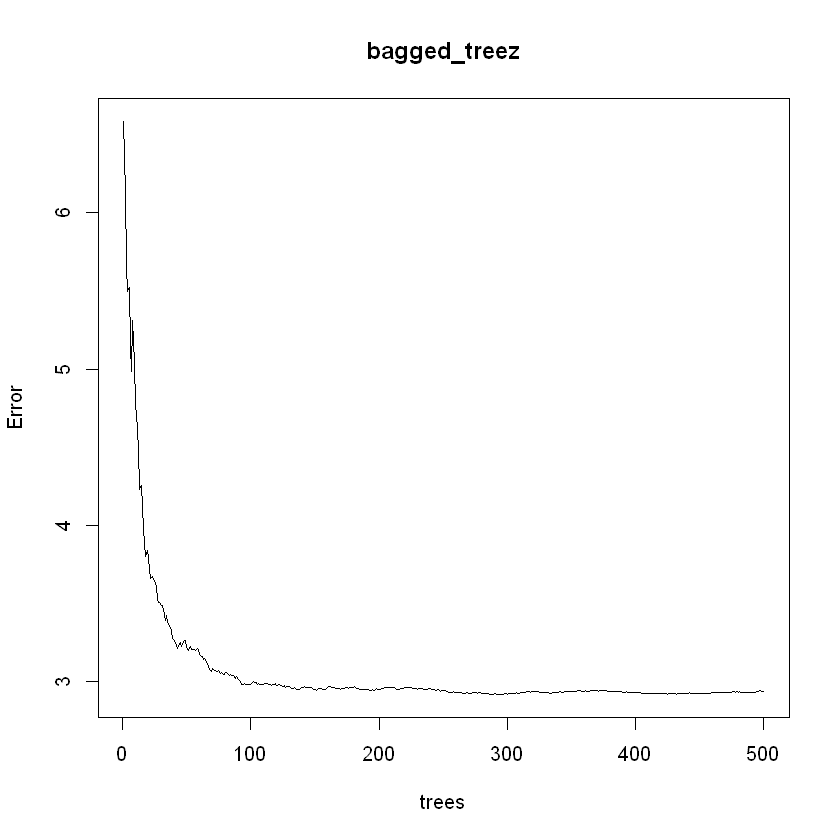

In [33]:
plot(bagged_treez)

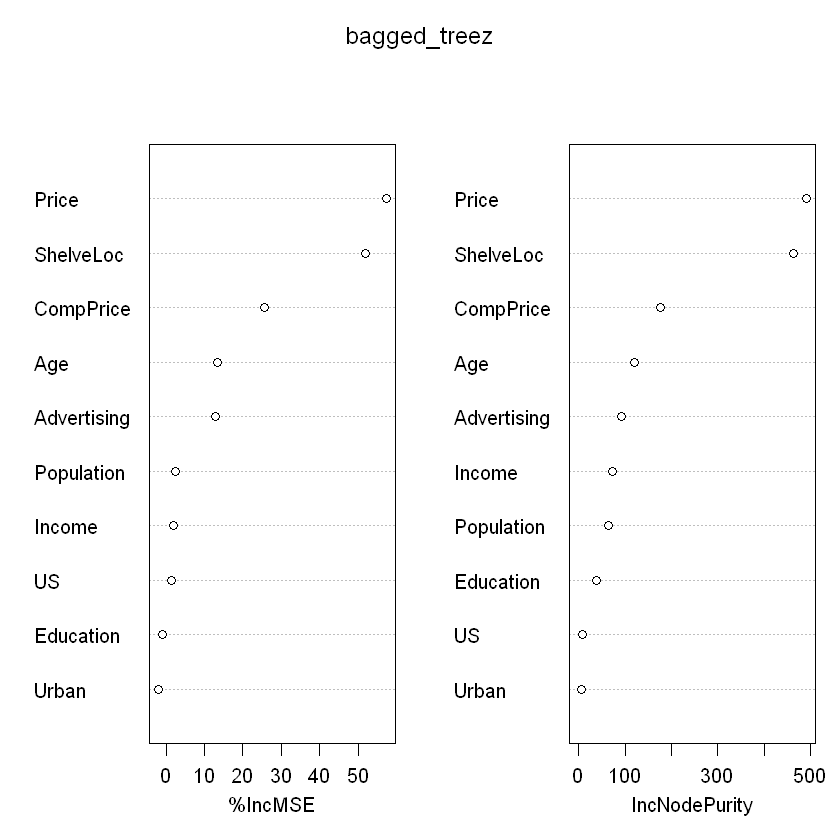

In [34]:
varImpPlot(bagged_treez)

In [37]:
library(knitr)

In [38]:
kable(importance(bagged_treez))



|            |   %IncMSE| IncNodePurity|
|:-----------|---------:|-------------:|
|CompPrice   | 25.528498|    176.093896|
|Income      |  1.855542|     72.436092|
|Advertising | 12.969907|     92.380207|
|Population  |  2.325814|     64.203473|
|Price       | 57.470719|    492.559015|
|ShelveLoc   | 51.826833|    463.698394|
|Age         | 13.428816|    120.257407|
|Education   | -1.024999|     37.137628|
|Urban       | -1.869618|      6.131053|
|US          |  1.505402|      6.616913|

Price and ShelveLoc are the most important variables.

e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables
aremost important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

## Exercise 9

This problem involves the OJ data set which is part of the ISLR
package.

a) Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

In [47]:
set.seed(666)

train=sample(1:nrow(OJ),800)

OJ_train=OJ[train,]
OJ_test=OJ[-train,]

In [51]:
head(OJ_train)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
829,CH,251,4,1.99,2.23,0.00,0.0,0,0,0.945540,2.23,1.99,0.24,No,0.000000,0.000000,0.24,4
211,CH,258,7,1.86,2.18,0.00,0.0,0,0,0.923496,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1045,CH,241,1,1.86,1.99,0.00,0.3,0,1,0.777178,1.69,1.86,-0.17,No,0.150754,0.000000,0.13,1
215,CH,264,7,1.86,2.13,0.37,0.0,1,0,0.968664,2.13,1.49,0.64,Yes,0.000000,0.198925,0.27,0
386,MM,228,2,1.69,1.69,0.00,0.0,0,0,0.206716,1.69,1.69,0.00,No,0.000000,0.000000,0.00,2
791,MM,241,3,1.79,2.23,0.00,0.0,0,0,0.500000,2.23,1.79,0.44,No,0.000000,0.000000,0.44,3


In [52]:
head(OJ_test)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
7,CH,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
8,CH,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
10,CH,238,7,1.75,1.99,0.00,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
12,CH,263,7,1.86,2.13,0.27,0.0,0,0,0.990885,2.13,1.59,0.54,Yes,0.000000,0.145161,0.27,0
22,CH,258,1,1.76,2.18,0.00,0.0,0,0,0.680000,2.18,1.76,0.42,No,0.000000,0.000000,0.42,1
23,CH,259,7,1.86,2.18,0.00,0.0,0,0,0.744000,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0


b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [49]:
OJ_tree=tree(Purchase~.,data=OJ_train) 
summary(OJ_tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ_train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "SpecialCH"
Number of terminal nodes:  9 
Residual mean deviance:  0.7347 = 581.2 / 791 
Misclassification error rate: 0.1625 = 130 / 800 

c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed

In [50]:
OJ_tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.508643 353  415.10 MM ( 0.27479 0.72521 )  
     4) LoyalCH < 0.277977 161  112.80 MM ( 0.11180 0.88820 )  
       8) LoyalCH < 0.035047 55    0.00 MM ( 0.00000 1.00000 ) *
       9) LoyalCH > 0.035047 106   96.58 MM ( 0.16981 0.83019 ) *
     5) LoyalCH > 0.277977 192  260.10 MM ( 0.41146 0.58854 )  
      10) PriceDiff < 0.195 84   84.62 MM ( 0.20238 0.79762 )  
        20) SpecialCH < 0.5 67   49.01 MM ( 0.11940 0.88060 ) *
        21) SpecialCH > 0.5 17   23.51 CH ( 0.52941 0.47059 ) *
      11) PriceDiff > 0.195 108  147.30 CH ( 0.57407 0.42593 ) *
   3) LoyalCH > 0.508643 447  348.80 CH ( 0.86801 0.13199 )  
     6) LoyalCH < 0.764572 189  214.20 CH ( 0.74603 0.25397 )  
      12) PriceDiff < -0.165 33   43.26 MM ( 0.36364 0.63636 ) *
      13) PriceDiff > -0.165 156  143.70 CH ( 0.82692 0.17308 )  
        26) PriceDiff < 0.265 86   99.88 CH ( 0

d) Create a plot of the tree, and interpret the results.

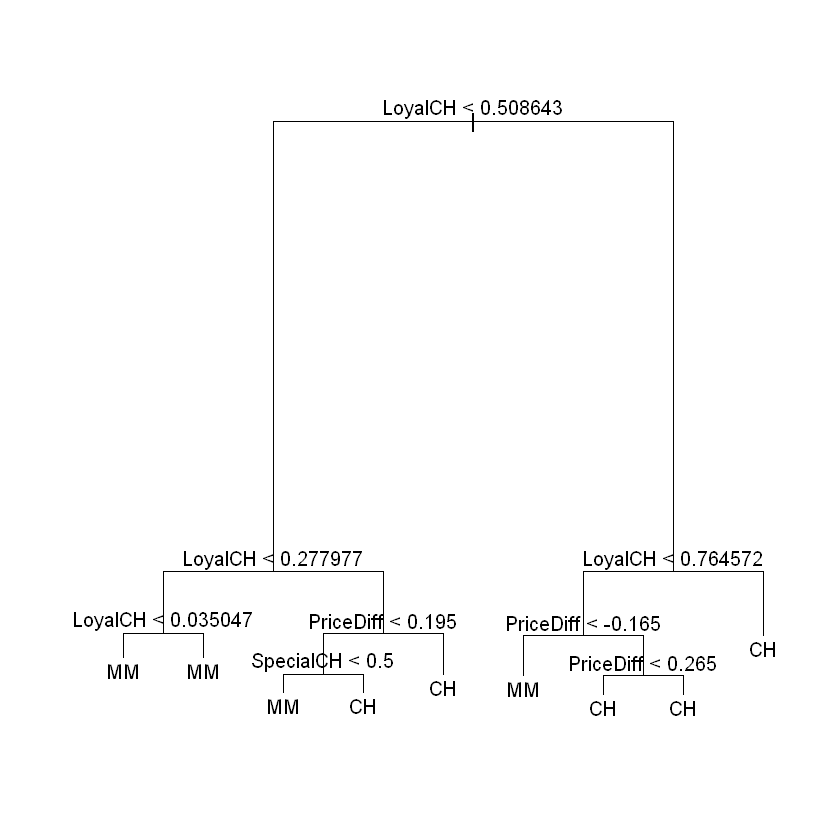

In [55]:
plot(OJ_tree)
text(OJ_tree)

The left branch shows a relative low customer loyalty for CH than MM. On the other hand, in the right branch this model predicts that when there is a strong preference for CH it will always be the drink chosen. 

e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [57]:
OJ_pred_train=predict(OJ_tree,OJ_train,type = 'class')
kable(table(OJ_train[,'Purchase'],OJ_pred_train))



|   |  CH|  MM|
|:--|---:|---:|
|CH | 447|  38|
|MM |  92| 223|

In [59]:
kable(table(OJ_train[,'Purchase'],OJ_pred_train)/nrow(OJ_train))



|   |      CH|      MM|
|:--|-------:|-------:|
|CH | 0.55875| 0.04750|
|MM | 0.11500| 0.27875|

In [61]:
OJ_pred_test=predict(OJ_tree,OJ_test,type = 'class')
kable(table(OJ_test[,'Purchase'],OJ_pred_test))



|   |  CH| MM|
|:--|---:|--:|
|CH | 150| 18|
|MM |  26| 76|

In [62]:
kable(table(OJ_test[,'Purchase'],OJ_pred_test)/nrow(OJ_test))



|   |        CH|        MM|
|:--|---------:|---------:|
|CH | 0.5555556| 0.0666667|
|MM | 0.0962963| 0.2814815|

f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

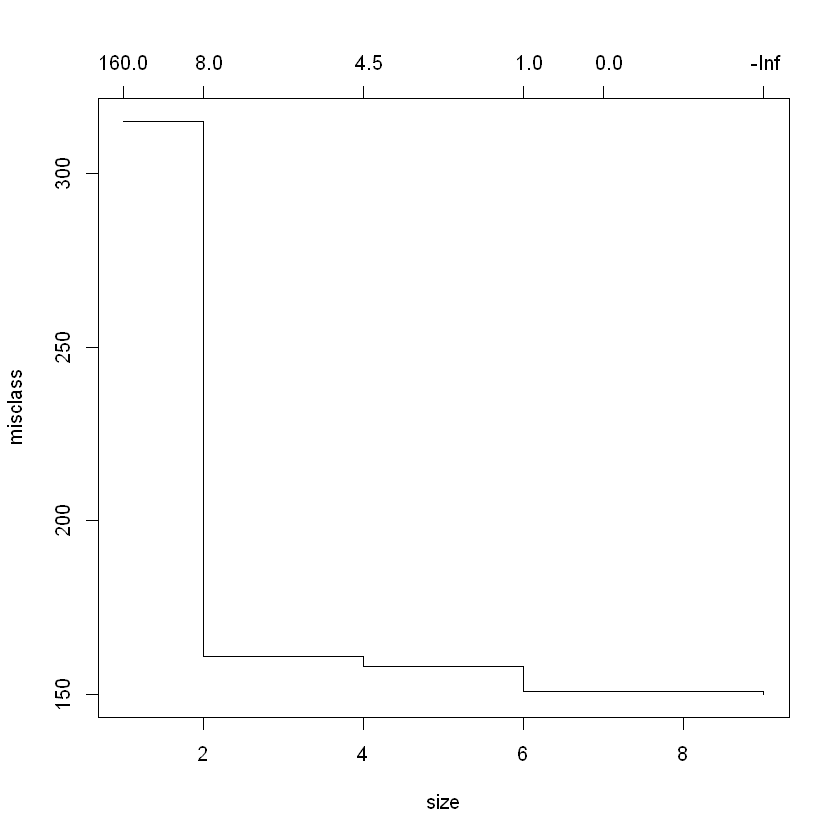

In [63]:
OJ_tree_cv=cv.tree(OJ_tree,K = 10,FUN = prune.misclass)
plot(OJ_tree_cv)

Optimal size is 2

In [64]:
OJ_tree=prune.misclass(OJ_tree,best = 2)

OJ_pred_train=predict(OJ_tree,OJ_train,type = 'class')
kable(table(OJ_train[,'Purchase'],OJ_pred_train))



|   |  CH|  MM|
|:--|---:|---:|
|CH | 388|  97|
|MM |  59| 256|

## Exercise 10 

We now use boosting to predict Salary in the Hitters data set.

In [67]:
str(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [68]:
sum(is.na(Hitters$Salary))

[1] 59

In [70]:
Hitters_null=is.na(Hitters[,"Salary"])
Hitters=Hitters[!Hitters_null,]
Hitters[,"Salary"]=log(Hitters[,"Salary"])

In [71]:
summary(Hitters)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    